# Data and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.mixture import GaussianMixture

In [3]:
# Import data
data = pd.read_csv('CreditCard.csv')
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


# Data preparation

In [5]:
# Transform characater variables
df = pd.get_dummies(data, drop_first=True)
df.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0


# Gaussian Mixture Model

Text(0.5, 0, 'Number of Components')

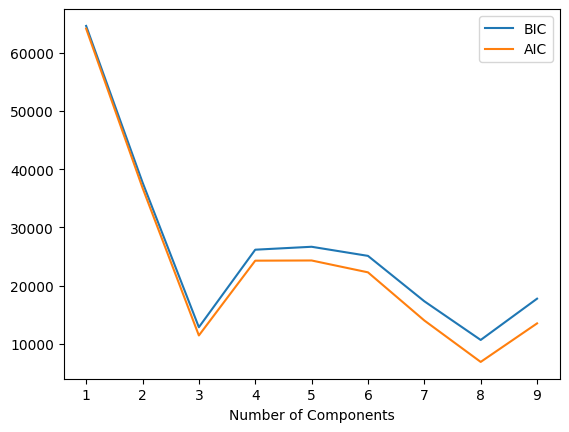

In [6]:
# Finding optimal number of clusters
# Prepare
n_components = np.arange(1, 10)


# Create GMM Model
models = [GaussianMixture(n_components=n, random_state=1502).fit(df) for n in n_components]

# Plot
plt.plot(n_components, [m.bic(df) for m in models], label='BIC')

plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
plt.legend()
plt.xlabel('Number of Components')

In [7]:
# Gaussian Mixture Model
model = GaussianMixture(3, random_state=1502).fit(df)

# Interpretation

In [9]:
# Predict the cluster for each customer
cluster = pd.Series(model.predict(df))
cluster[:2]

0    2
1    2
dtype: int64

In [10]:
# Create Cluster variable
df['Cluster'] = cluster
df.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,Cluster
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0,2
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0,2
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0,2
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0,2
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0,2


In [12]:
# Check how many people per Cluster
df.Cluster.value_counts()

2    720
1    303
0    296
Name: Cluster, dtype: int64

In [13]:
# Interpretation
pd.DataFrame(model.means_, columns=list(df.drop(columns=['Cluster']).columns))

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
1,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921
2,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000


In [ ]:
# Names
#Cluster 0: Non-Credit Users

#Cluster 1: Succesful Entrepeneurs

#Cluster 2: Young Employees

# Challenge Time

## Libraries and Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [29]:
df = pd.read_csv('CC GENERAL.csv').dropna()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [30]:
cc_df = df.drop(columns=['CUST_ID', 'INSTALLMENTS_PURCHASES'])
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


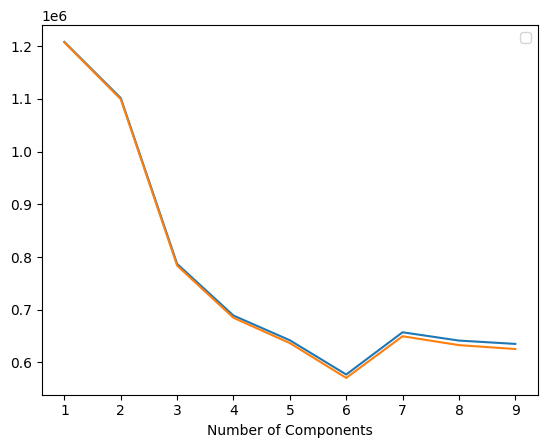

In [22]:
# Optimal cluster plot
n_comps = np.arange(1, 10)

models = [GaussianMixture(n_components=n, random_state=1502).fit(cc_df) for n in n_comps]


plt.plot(n_comps, [m.bic(cc_df) for m in models] )
plt.plot(n_comps, [m.aic(cc_df) for m in models])
plt.legend()

plt.xlabel("Number of Components")
plt.show()

In [23]:
# Create my model
model = GaussianMixture(6, random_state=1502).fit(cc_df)


In [31]:
preds = pd.Series(model.predict(cc_df))

cc_df['cluster'] = preds
df['cluster'] = preds
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,4.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,4.0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,4.0


In [27]:
cc_df.cluster.value_counts()

4.0    2535
3.0    1852
1.0    1377
5.0    1263
0.0     921
2.0     391
Name: cluster, dtype: int64

In [28]:
pd.DataFrame(model.means_, columns=cc_df.drop(columns=['cluster']).columns)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,948.201940,0.854350,853.144557,581.364915,1200.515622,0.534872,0.269390,0.325869,0.198989,4.034175,11.454346,3573.896591,1575.913507,389.811638,0.146231,10.200147
1,184.157208,0.799833,460.721744,0.000000,0.000000,0.709221,0.000000,0.670112,0.000000,0.000000,10.793532,3005.040423,563.260455,161.599125,0.368887,11.422602
2,3943.397914,0.950141,4657.237606,2962.563060,3687.937805,0.690596,0.390775,0.545523,0.286960,11.623466,52.851424,8297.915109,8012.311683,4319.781183,0.170156,11.412636
3,2181.701571,0.901940,0.000000,0.000000,1987.737362,0.000000,0.000000,0.000000,0.277165,6.250194,0.000000,4038.598933,1670.648547,737.036278,0.046140,11.347256
4,1025.681540,0.895378,1648.062948,1061.629861,0.000000,0.664065,0.396257,0.443453,0.000000,0.000000,23.289260,5100.620315,1727.572007,511.100695,0.210724,12.000000
5,3189.004365,1.000000,892.157971,520.375809,1627.240715,0.563340,0.247053,0.406082,0.267683,6.154536,15.958076,5237.063726,1614.944974,1790.470037,0.000000,12.000000


* Cluster 0: Lower Middle Class
* Cluster 1: Inactive
* Cluster 2: High Rollers
* Cluster 3: Conscious High Income
* Cluster 4: Upper Middle Class
* Cluster 5: Active Purchases